The target values are: [[0]
 [1]
 [1]
 [0]]
The predicted values are: [[0.99999842]
 [1.        ]
 [1.        ]
 [0.99999999]]


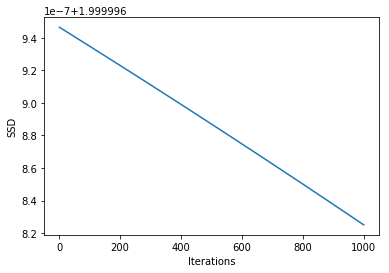

In [1]:
# Logic Operator

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Sigmoid function
def sigmoid(x):
    return 1.0/(1+ np.exp(-x))

# derivative of Sigmoid function for backprop.
def sigmoid_derivative(x):
    return x * (1.0 - x)

class NeuralNetwork:
    def __init__(self, x, y, N):
        self.input    = x
        self.neuron   = N
        self.weights1 = np.random.rand(self.input.shape[1], self.neuron) # X dimension input connected to N neurons
        self.weights2 = np.random.rand(self.neuron, 1)                   # N neurons connected to output            
        self.y        = y
        self.output   = np.zeros(self.y.shape)                # instantiating the output

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1)) 
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # Chain rule to calculate derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T,
                            (2*(self.y - self.output)
                            * sigmoid_derivative(self.output)))
        
        d_weights1 = np.dot(self.input.T,
                            (np.dot(2*(self.y - self.output)
                            * sigmoid_derivative(self.output),
                            self.weights2.T) * sigmoid_derivative(self.layer1)))

        # weights updating
        self.weights1 += d_weights1
        self.weights2 += d_weights2


iterations = 1000
n_unit = 50

if __name__ == "__main__": 
    
    """Input = np.array([[0,0,1],
                      [0,1,1],
                      [1,0,1],
                      [1,1,1]])
    
    Target = np.array([[0],[0],[0],[1]])"""
    
    Input = np.array([[0,0,0],
                      [0,1,1],
                      [1,0,1],
                      [1,1,0]])
    
    Target = np.array([[0],[1],[1],[0]])
               
    model = NeuralNetwork(Input, Target, n_unit)
    
    SSD = []
    for i in range(iterations):
        model.feedforward()
        model.backprop()
        errors = (Target - model.output)**2
        SSD.append(np.sum(errors))            # Objective(loss) function
                      

    Itr = np.linspace(1,len(SSD),len(SSD))    
    plt.plot(Itr, SSD)
    plt.xlabel('Iterations')
    plt.ylabel('SSD')

    print("The target values are:", Target)
    print("The predicted values are:", model.output)


In [2]:
#Task 1 AND
#For 10-50 the error is still very large to get relevant predictions, therefore they will be wrong. 
#For 100-500 the error can still be reduced even though the predictions are correct. 
#For 500+ the error is much lower and the predictions are correct.

#Task 2 XOR
#For a 1000 iterations the model gets better predictions for the AND problem given that a single layer perceptron cannot solve the XOR problem.
#For 2-10 the results where improved and the error was almost 0, however, for 50 the classifier overfitted and the data was misclassified.

In [5]:
# Logic operator with Tensorflow Keras
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import tensorflow as tf
tf.config.gpu.set_per_process_memory_fraction(0.3)
tf.config.gpu.set_per_process_memory_growth(True)

Input = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
Target = np.array([[0],[1],[1],[0]], "float32")
n_unit = 50

model = Sequential()
model.add(Dense(n_unit, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer = SGD(),
              metrics=['binary_accuracy'])

model.fit(Input, Target, epochs = 5000, verbose=0)

print("The predicted class labels are:", model.predict(Input))

The predicted class labels are: [[0.50045216]
 [0.5673959 ]
 [0.50194854]
 [0.45733684]]


In [6]:
#The difference between task 3 and task 2 is that in task 3 MSE is used as loss function and in the hidden layer Relu is used as activation function.
#In task 2 the model learned how to classify just one type of output, yet in task 3 it didn´t learn how to classify any of both outputs.

In [11]:
# Data Loader
import os
import numpy as np
from random import shuffle
from skimage.io import imread
from skimage.transform import resize


img_w, img_h = 128, 128                                # Setting the width and heights of the images
data_path = '/Lab1/Skin/'           # Path to data root. Inside this path,
                                                        #two subfolder are placed one for train data and one for test data.


train_data_path = os.path.join(data_path, 'train')   
test_data_path = os.path.join(data_path, 'test')

train_list = os.listdir(train_data_path)
test_list = os.listdir(test_data_path)

# Assigning labels two images; those images contains pattern1 in their filenames
# will be labeled as class 0 and those with pattern2 will be labeled as class 1.
def gen_labels(im_name, pat1, pat2):
        if pat1 in im_name:
            Label = np.array([0])
        elif pat2 in im_name:
            Label = np.array([1])
        return Label

# reading and resizing the training images with their corresponding labels
def train_data(train_data_path, train_list):
    train_img = []       
    for i in range(len(train_list)):
        image_name = train_list[i]
        img = imread(os.path.join(train_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        train_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 200 == 0:
             print('Reading: {0}/{1}  of train images'.format(i, len(train_list)))
             
    shuffle(train_img)
    return train_img

# reading and resizing the testing images with their corresponding labels
def test_data(test_data_path, test_list):
    test_img = []       
    for i in range(len(test_list)):
        image_name = test_list[i]
        img = imread(os.path.join(test_data_path, image_name), as_grey=True)
        img = resize(img, (img_h, img_w), anti_aliasing = True).astype('float32')
        test_img.append([np.array(img), gen_labels(image_name, 'Mel', 'Nev')]) 
        
        if i % 100 == 0:
            print('Reading: {0}/{1} of test images'.format(i, len(test_list)))
             
    shuffle(test_img)   
    return test_img

# Instantiating images and labels for the model.
def get_train_test_data(train_data_path, test_data_path, train_list, test_list):
    
    Train_data = train_data(train_data_path, train_list)
    Test_data = test_data(test_data_path, test_list)
       
    Train_Img = np.zeros((len(train_list), img_h, img_w), dtype = np.float32)
    Test_Img = np.zeros((len(test_list), img_h, img_w), dtype = np.float32)
    
    Train_Label = np.zeros((len(train_list)), dtype = np.int32)
    Test_Label = np.zeros((len(test_list)), dtype = np.int32)
    
    for i in range(len(train_list)):
        Train_Img[i] = Train_data[i][0]
        Train_Label[i] = Train_data[i][1]
        
    Train_Img = np.expand_dims(Train_Img, axis = 3)   
    
    for j in range(len(test_list)):
        Test_Img[j] = Test_data[j][0]
        Test_Label[j] = Test_data[j][1]
        
    Test_Img = np.expand_dims(Test_Img, axis = 3)
        
    return Train_Img, Test_Img, Train_Label, Test_Label

x_train, x_test, y_train, y_test = get_train_test_data(
        train_data_path, test_data_path,
        train_list, test_list)

/usr/local/lib/python3.5/dist-packages/skimage/io/_io.py:48: UserWarning: `as_grey` has been deprecated in favor of `as_gray`
  warn('`as_grey` has been deprecated in favor of `as_gray`')


Reading: 0/1000  of train images
Reading: 200/1000  of train images
Reading: 400/1000  of train images
Reading: 600/1000  of train images
Reading: 800/1000  of train images
Reading: 0/200 of test images
Reading: 100/200 of test images


The predicted class labels are: [[0.56363857]
 [0.5858217 ]
 [0.54078144]
 [0.6358294 ]
 [0.6402254 ]
 [0.68047786]
 [0.45372814]
 [0.52404994]
 [0.59581745]
 [0.58172035]
 [0.45049608]
 [0.57971406]
 [0.54108876]
 [0.5945775 ]
 [0.5873445 ]
 [0.55728376]
 [0.571247  ]
 [0.48423782]
 [0.61238486]
 [0.5513102 ]
 [0.6274426 ]
 [0.5362627 ]
 [0.6229832 ]
 [0.535387  ]
 [0.5572968 ]
 [0.56942505]
 [0.5685442 ]
 [0.5461904 ]
 [0.5207778 ]
 [0.5268628 ]
 [0.47104165]
 [0.6117352 ]
 [0.5534779 ]
 [0.4618108 ]
 [0.5666108 ]
 [0.5828804 ]
 [0.5797714 ]
 [0.5121896 ]
 [0.6027621 ]
 [0.55147415]
 [0.5832634 ]
 [0.41813964]
 [0.54122466]
 [0.45273817]
 [0.30866927]
 [0.5613897 ]
 [0.57551265]
 [0.6216654 ]
 [0.5789835 ]
 [0.52519256]
 [0.5784345 ]
 [0.42811525]
 [0.54552066]
 [0.5359245 ]
 [0.35896748]
 [0.5487274 ]
 [0.32085288]
 [0.58816856]
 [0.52690816]
 [0.56766886]
 [0.45140177]
 [0.57459104]
 [0.5313389 ]
 [0.5901208 ]
 [0.62106764]
 [0.5190727 ]
 [0.54224974]
 [0.6113108 ]
 [0.61755013]
 [

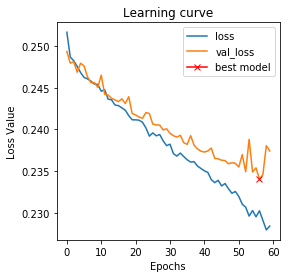

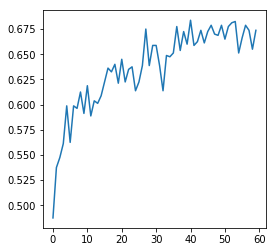

In [66]:
# MLP Example; Complete the code
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

def MLP(img_width,img_height, base):

    model = Sequential()
    model.add(Dense(base, input_dim=(img_width*img_height), activation='relu'))
    model.add(Dense(base//2, activation='relu'))
    model.add(Dense(base//4, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    return model

img_width = 100
img_height = 100
base = 64

Input = np.reshape(x_train, (1000,10000))
Test_Input = np.reshape(x_test, (200,10000))
Target = y_train
Test_Target = y_test

model = MLP(img_width,img_height, base)

model.compile(loss='mean_squared_error',
                  optimizer = SGD(lr=0.001),
                  metrics=['binary_accuracy'])

History = model.fit(Input, Target, epochs = 60, batch_size= 16, verbose=0, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(Test_Input,Test_Target,batch_size= 16, verbose=0)
print("The predicted class labels are:", model.predict(Input), test_loss, test_accuracy)
    

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

plt.figure(figsize=(4,4))
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")



In [ ]:
#Task 4: So the lower the learning rate the more stable the loss function and the training is.
#We tested different activation fcn and sigmoid gave us the best results.
#the highest learning rate has the highest loss rate and lowest accuracy for both training and test data.
#the lowest learning rate has the lowest loss rate and highest accuracy for training data -> overfitting the training data
#the middle learning rate has the lowest loss rate and highest accuracy for test data. -> best model 

In [87]:
# LeNet Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

def model(img_ch, img_width, img_height):
    Base = 8
    model = Sequential()
    model.add(Conv2D(Base, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same',
                     input_shape = (img_width, img_height, img_ch)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(Base*2, kernel_size = (3, 3), activation='relu',
                     strides=1, padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    model.add(Dense(Base*2, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.summary()
    
    return model
img_width = 100
img_height = 100
img_ch = 1

Input = x_train/255.
Test_Input = x_test/255.
Target = y_train
Test_Target = y_test
model = model(img_ch,img_width,img_height)

model.compile(loss='mean_squared_error',
                  optimizer = SGD(lr=0.01),
                  metrics=['binary_accuracy'])

History = model.fit(Input, Target, epochs = 80, batch_size= 8, verbose=0, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(Test_Input,Test_Target,batch_size= 8, verbose=0)
print("The predicted class labels are:", model.predict(Input), test_loss, test_accuracy)
    

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

plt.figure(figsize=(4,4))
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 100, 100, 8)       80        
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 25, 25, 16)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 10000)             0         
_________________________________________________________________
dense_133 (Dense)            (None, 16)                160016    
_________________________________________________________________
dense_134 (Dense)            (None, 1)               

ValueError: Error when checking input: expected conv2d_52_input to have shape (100, 100, 1) but got array with shape (128, 128, 1)

In [ ]:
#5c)Less features less accuracy and higher loss fcn
#5d) Higher learning rate with less features and 80 epochs resulted in higher accuracz and lower loss fcn compared to previous learning rate
#5e) the role of the first two conv-layers is feature extraction 
#5f) the role of the last two dense-layers is to perform classification
#5g) in MLP you don't really have feature extraction. In leNet the position of the pixels are of importance and the information is not lost as is the case with mlp
#5h) Depending on the performed task and type of output we want to obtain 

In [28]:
# AlexNet Model
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

def model(img_ch, img_width, img_height):
    Base = 8
    model = Sequential()
    
    model.add(Conv2D(filters=Base, input_shape=(img_width, img_height, img_ch),
                     kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*4, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))

    model.add(Conv2D(filters=Base*2, kernel_size=(3,3), strides=(1,1), padding='same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dense(128))
    model.add(Activation('relu'))


    model.add(Dense(64))
    model.add(Activation('relu'))


    model.add(Dense(1))
    model.add(Activation('sigmoid'))

    model.summary()   
    return model

img_width = 128
img_height = 128
img_ch = 1

Input = x_train
Test_Input = x_test
y_test[y_test == 0] = -1
y_train[y_train == 0] = -1
Target = y_train
Test_Target = y_test

model1 = model(img_ch,img_width,img_height)

model1.compile(loss='hinge',
                  optimizer = Adam(lr=0.0001),
                  metrics=['binary_accuracy'])



Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 128, 128, 8)       80        
_________________________________________________________________
activation_96 (Activation)   (None, 128, 128, 8)       0         
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 64, 64, 16)        1168      
_________________________________________________________________
activation_97 (Activation)   (None, 64, 64, 16)        0         
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 32)      

Train on 1000 samples, validate on 200 samples
Epoch 1/100
1000/1000 [==============================] - 1s 774us/sample - loss: 0.9999 - binary_accuracy: 0.0000e+00 - val_loss: 0.9989 - val_binary_accuracy: 0.0000e+00
Epoch 2/100
1000/1000 [==============================] - 0s 482us/sample - loss: 1.0022 - binary_accuracy: 0.0000e+00 - val_loss: 0.9977 - val_binary_accuracy: 0.0000e+00
Epoch 3/100
1000/1000 [==============================] - 0s 482us/sample - loss: 0.9982 - binary_accuracy: 0.0000e+00 - val_loss: 0.9956 - val_binary_accuracy: 0.0000e+00
Epoch 4/100
1000/1000 [==============================] - 0s 498us/sample - loss: 0.9953 - binary_accuracy: 0.0000e+00 - val_loss: 0.9875 - val_binary_accuracy: 0.0000e+00
Epoch 5/100
1000/1000 [==============================] - 0s 492us/sample - loss: 0.9732 - binary_accuracy: 0.0580 - val_loss: 0.9395 - val_binary_accuracy: 0.0250
Epoch 6/100
1000/1000 [==============================] - 0s 477us/sample - loss: 0.9000 - binary_accuracy:

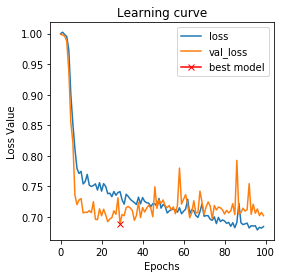

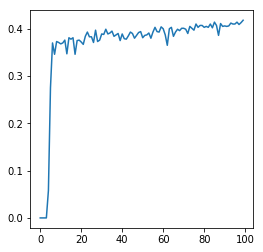

In [29]:
History = model1.fit(Input, Target, epochs = 100, batch_size=16, verbose=1,
                     validation_data=(x_test, y_test))


    

plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(History.history["loss"], label="loss")
plt.plot(History.history["val_loss"], label="val_loss")
plt.plot( np.argmin(History.history["val_loss"]),
         np.min(History.history["val_loss"]),
         marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")
plt.legend(); 

plt.figure(figsize=(4,4))
plt.plot(History.history["binary_accuracy"], label="binary_accuracy")


(1000, 128, 128, 1)


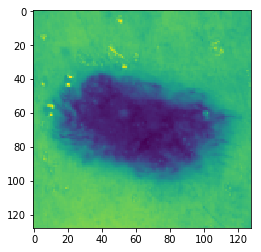

In [26]:
import matplotlib.pyplot as plt
print(np.shape(x_train))
plt.imshow(x_train[1,:,:,0])